In [1]:
#Importing the basic librarires fot analysis

import numpy as np  # linear algebra
import pandas as pd  # data processing
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import re

In [2]:
#Importing the dataset
df=pd.read_excel("hotel_reviews.xlsx")
# look the data set
df.head()

Review  Rating
0  nice hotel expensive parking got good deal sta...     4.0
1  ok nothing special charge diamond member hilto...     2.0
2  nice rooms not 4* experience hotel monaco seat...     3.0
3  unique, great stay, wonderful time hotel monac...     5.0
4  great stay great stay, went seahawk game aweso...     5.0

In [3]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  20491 non-null  object 
 1   Rating  20491 non-null  float64
dtypes: float64(1), object(1)
memory usage: 320.3+ KB


In [4]:
# look  describe data set
df["Rating"].describe().round(2)

count    20491.00
mean         3.95
std          1.23
min          1.00
25%          3.00
50%          4.00
75%          5.00
max          5.00
Name: Rating, dtype: float64

In [5]:
# checking any duplicate data 
df.duplicated().sum()

0

C:\Users\Shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


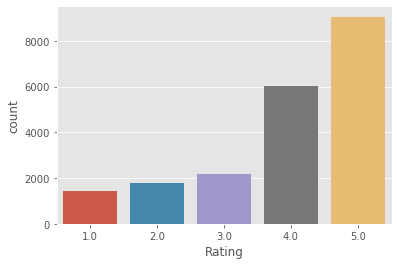

In [6]:
# how much percentage rating in the dataset

sns.countplot(df["Rating"])
plt.show()

In [7]:
# Length of word in sentence
df["Length"] = df['Review'].apply(len)
df.head()

Review  Rating  Length
0  nice hotel expensive parking got good deal sta...     4.0     593
1  ok nothing special charge diamond member hilto...     2.0    1689
2  nice rooms not 4* experience hotel monaco seat...     3.0    1427
3  unique, great stay, wonderful time hotel monac...     5.0     600
4  great stay great stay, went seahawk game aweso...     5.0    1281

In [8]:
# look  describe data set
df["Length"].describe().round(2)

count    20491.00
mean       725.25
std        689.93
min         44.00
25%        339.00
50%        537.00
75%        859.00
max      13501.00
Name: Length, dtype: float64

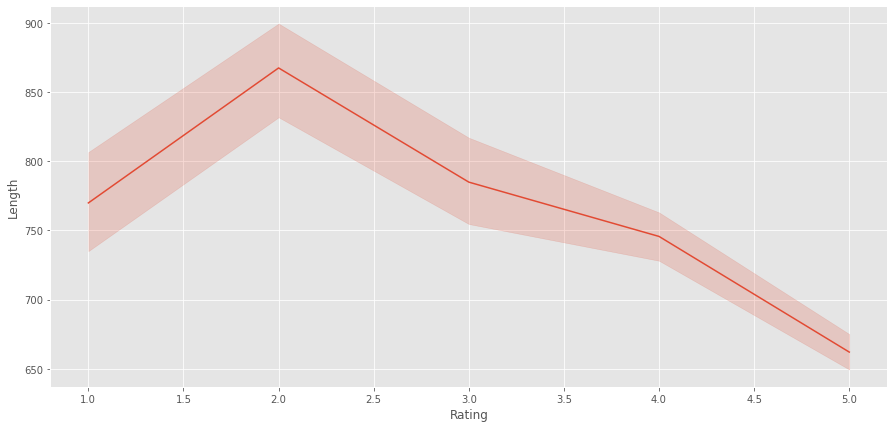

In [9]:
# graph what the the relationship between Rating and Length

plt.figure(figsize=(15,7))
sns.lineplot(data=df,x="Rating", y="Length");

In [10]:
px.scatter(df,x="Rating",y="Length", color="Rating")

In [11]:
# grouping the data as per rating==5
df_5=df[df["Rating"]==5]
df_5

Review  Rating  Length
3      unique, great stay, wonderful time hotel monac...     5.0     600
4      great stay great stay, went seahawk game aweso...     5.0    1281
5      love monaco staff husband stayed hotel crazy w...     5.0    1002
6      cozy stay rainy city, husband spent 7 nights m...     5.0     748
8      hotel stayed hotel monaco cruise, rooms genero...     5.0     419
...                                                  ...     ...     ...
20473  best best reason affordable better hotels city...     5.0     152
20476  night not trust not disappointed stay hotel, s...     5.0    1082
20480  great play stay stay loyal inn package deal ha...     5.0     256
20482  great choice wife chose best western quite bit...     5.0     716
20486  best kept secret 3rd time staying charm, not 5...     5.0     733

[9054 rows x 3 columns]

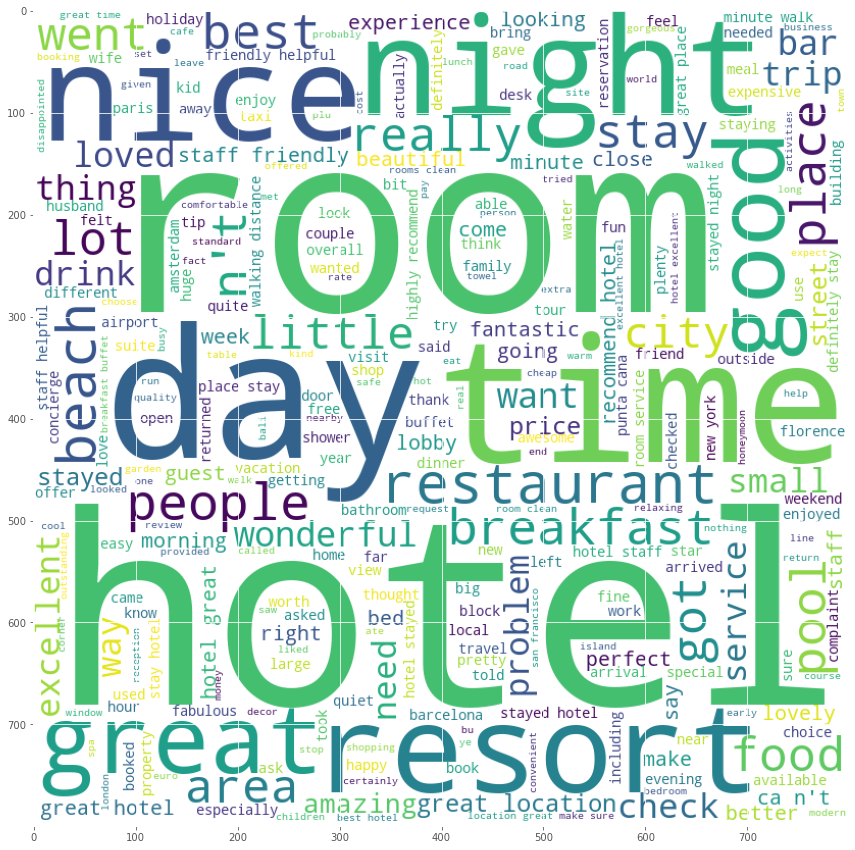

In [12]:
# the highest word repeat in the review rating 5

plt.figure(figsize=(15,15))
wc1 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df_5['Review']))

plt.imshow(wc1);

In [13]:
# grouping the data as per rating==4
df_4=df[df["Rating"]==4]
df_4

Review  Rating  Length
0      nice hotel expensive parking got good deal sta...     4.0     593
7      excellent staff, housekeeping quality hotel ch...     4.0     597
11     nice value seattle stayed 4 nights late 2007. ...     4.0     364
12     nice hotel good location hotel kimpton design ...     4.0     569
14     great hotel night quick business trip, loved l...     4.0     202
...                                                  ...     ...     ...
20475  good stay spent night pacific northwest/northe...     4.0     441
20477  nice hotel pioneer square area stayed late aug...     4.0     454
20478  just fine, hotel located pioneer square just q...     4.0     727
20483  good bed clean convenient just night happy sta...     4.0     420
20487  great location price view hotel great quick pl...     4.0     306

[6039 rows x 3 columns]

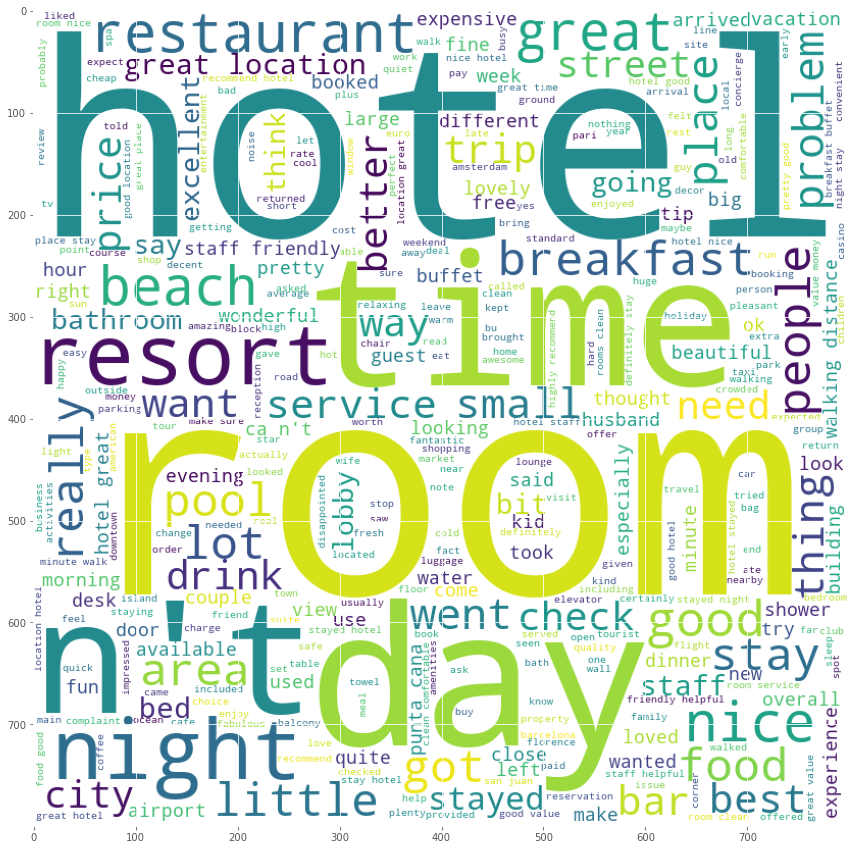

In [14]:
# the highest word repeat in the review rating 4

plt.figure(figsize=(15,15))
wc2 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df_4['Review']))

plt.imshow(wc2)

In [15]:
# grouping the data as per rating==3
df_3=df[df["Rating"]==3]
df_3

Review  Rating  Length
2      nice rooms not 4* experience hotel monaco seat...     3.0    1427
13     nice hotel not nice staff hotel lovely staff q...     3.0     417
19     hmmmmm say really high hopes hotel monaco chos...     3.0    1025
25     n't mind noise place great, read reviews noise...     3.0     482
27     met expectations centrally located hotel block...     3.0     538
...                                                  ...     ...     ...
20406  good good great location new clean modern bath...     3.0     376
20408  ok ok. room clean tidy, staff friendly, good h...     3.0     165
20419  nice try stayed hotel day grand opening, booke...     3.0     699
20446  ok short stay booked hotel night stopover, sin...     3.0     566
20458  perfect ca n't beat location, beach incredible...     3.0     180

[2184 rows x 3 columns]

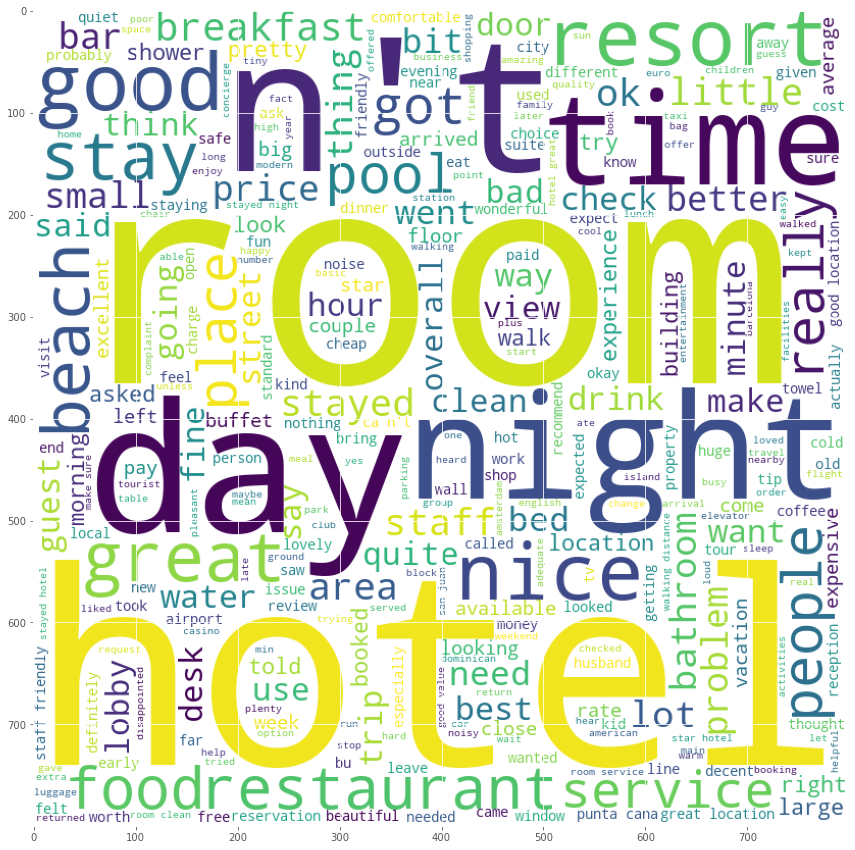

In [16]:
# the highest word repeat in the review rating 3

plt.figure(figsize=(15,15))
wc3 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df_3['Review']))

plt.imshow(wc3)

In [17]:
# grouping the data as per rating==2
df_2=df[df["Rating"]==2]
df_2

Review  Rating  Length
1      ok nothing special charge diamond member hilto...     2.0    1689
10     poor value stayed monaco seattle july, nice ho...     2.0     333
16     disappointed say anticipating stay hotel monac...     2.0    1662
24     great location need internally upgrade advanta...     2.0     250
33     good location poor cleanliness warwick hotel g...     2.0     576
...                                                  ...     ...     ...
20481  ok price look hotel ok little run average clea...     2.0     247
20484  deceptive staff deceptive desk staff claiming ...     2.0     695
20485  not impressed unfriendly staff checked asked h...     2.0     616
20488  ok just looks nice modern outside, desk staff ...     2.0     443
20490  people talking, ca n't believe excellent ratin...     2.0     620

[1793 rows x 3 columns]

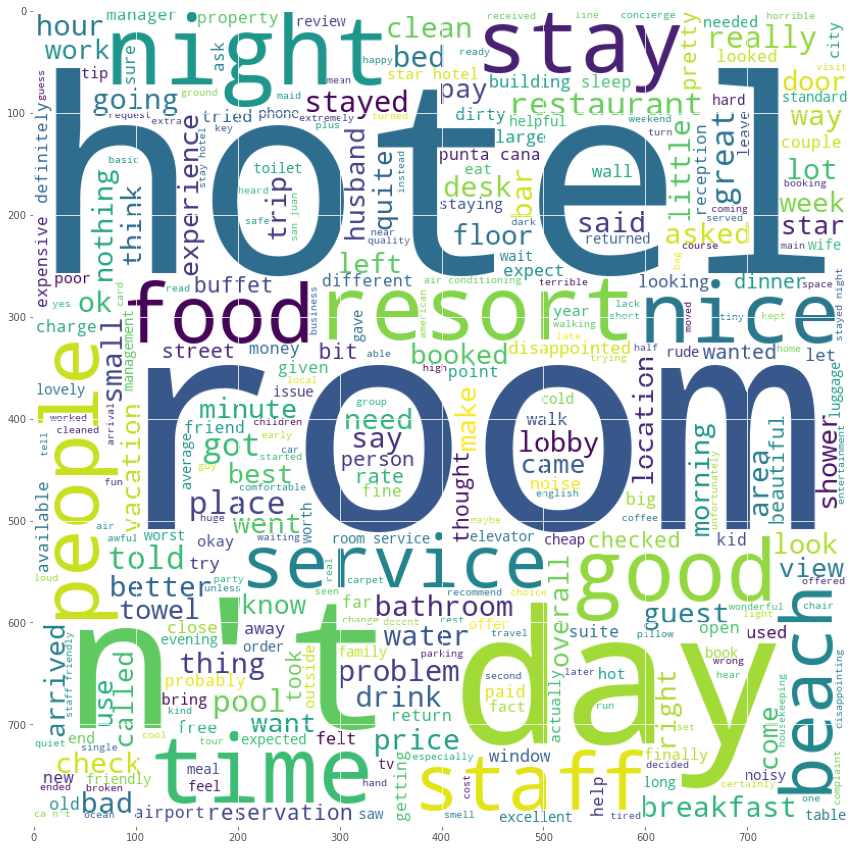

In [18]:
# the highest word repeat in the review rating 2

plt.figure(figsize=(15,15))
wc4 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df_2['Review']))

plt.imshow(wc4)

In [19]:
# grouping the data as per rating==1
df_1=df[df["Rating"]==1]
df_1

Review  Rating  Length
15     horrible customer service hotel stay february ...     1.0    1411
32     noise airconditioner-a standard, arranged stay...     1.0     614
40     bad choice, booked hotel hot wire called immed...     1.0     861
65     hated inn terrible, room-service horrible staf...     1.0     133
69     ace grunge lives does mold mildew tiny bed met...     1.0      84
...                                                  ...     ...     ...
20421  worst sleep hip tooooo hip nite club building ...     1.0     342
20460  june 08 stay stayed hotel june 6/6-6/8/08, rea...     1.0     682
20465  not stay hotel brought group february worst ho...     1.0     305
20467  returning la concha nightmare surprising hotel...     1.0     460
20489  hotel theft ruined vacation hotel opened sept ...     1.0    5557

[1421 rows x 3 columns]

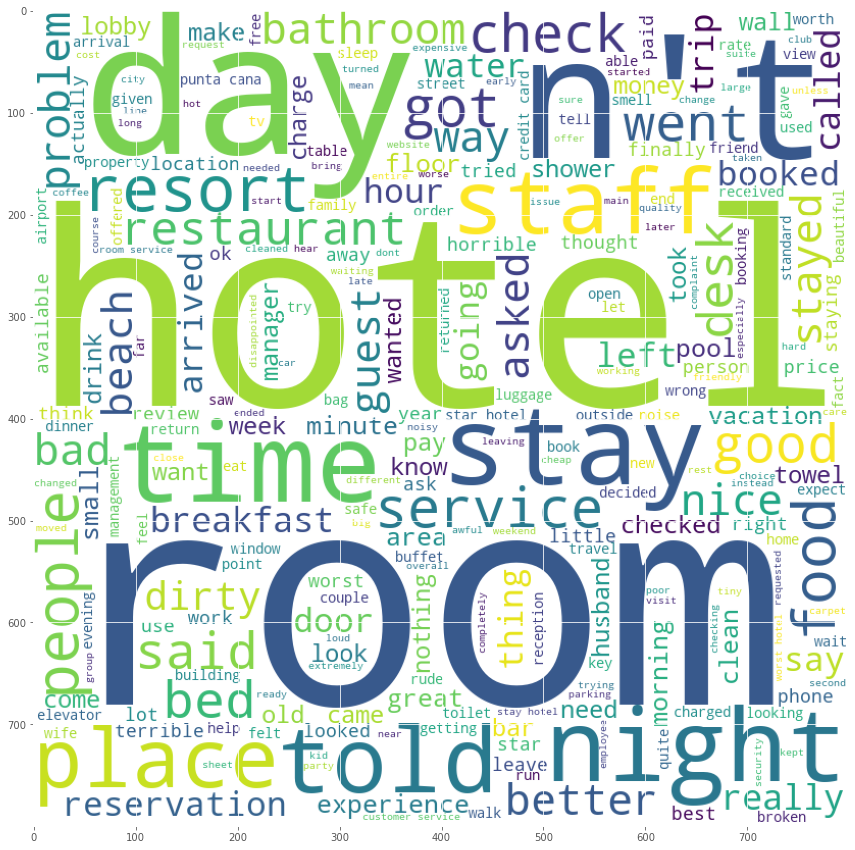

In [20]:
# the highest word repeat in the review rating 1

plt.figure(figsize=(15,15))
wc5 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df_1['Review']))

plt.imshow(wc5)

In [21]:
#Analysis Results😃😃😃
#We have 20K Reviews in the hotel and the Rating Reviews from 1 to 5
#The percentage rating in the data set
#5 = 44%
#4 = 30%
#3 = 10%
#2 = 9%
#1 = 7%
#I see the length reviews has effect in the rating.
#Rating 5 = 44% -> satisfy
#We see the people satisfy = rating 5 in this words
#In general the hotel - room - night - beach - restaurant and food and drink - bed - pool - locations.
#Rating 4 = 30% -> satisfy
#We see the people satisfy = rating 4 in this words the same rating 5 but plus ...
#beautiful hotel - staff friendly - service - street - .
#Rating 2 = 9% -> unsatisfied
#We see the people unsatisfied = rating 2 in this words the same rating 5 & 4 but plus ...
#Hotel - staff - beach - srevice - disk - stay - shower
#Rating 1 = 7% -> unsatisfied
#We see the people unsatisfied = rating 1 in this words the same rating 5 & 4 but plus ...
#room - hotel - place - staff - door - check in - sleep - toilet - resort -water.
#I see around 75 % from visitors satisfied

# 2- Making clean text for ML & TF

In [22]:
df.head()

Review  Rating  Length
0  nice hotel expensive parking got good deal sta...     4.0     593
1  ok nothing special charge diamond member hilto...     2.0    1689
2  nice rooms not 4* experience hotel monaco seat...     3.0    1427
3  unique, great stay, wonderful time hotel monac...     5.0     600
4  great stay great stay, went seahawk game aweso...     5.0    1281

In [23]:
# first review
a=df.iloc[0,0]
a

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

In [24]:
# First I want making clean the first review and I will make for loop or Function

In [25]:
 # import library for Natural Language Toolkit
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [26]:
# remove any symbol and cover letter to lowercase

a=re.sub('[^a-zA-Z0-9]',' ',a)
a=a.lower().split()
a

['nice',
 'hotel',
 'expensive',
 'parking',
 'got',
 'good',
 'deal',
 'stay',
 'hotel',
 'anniversary',
 'arrived',
 'late',
 'evening',
 'took',
 'advice',
 'previous',
 'reviews',
 'did',
 'valet',
 'parking',
 'check',
 'quick',
 'easy',
 'little',
 'disappointed',
 'non',
 'existent',
 'view',
 'room',
 'room',
 'clean',
 'nice',
 'size',
 'bed',
 'comfortable',
 'woke',
 'stiff',
 'neck',
 'high',
 'pillows',
 'not',
 'soundproof',
 'like',
 'heard',
 'music',
 'room',
 'night',
 'morning',
 'loud',
 'bangs',
 'doors',
 'opening',
 'closing',
 'hear',
 'people',
 'talking',
 'hallway',
 'maybe',
 'just',
 'noisy',
 'neighbors',
 'aveda',
 'bath',
 'products',
 'nice',
 'did',
 'not',
 'goldfish',
 'stay',
 'nice',
 'touch',
 'taken',
 'advantage',
 'staying',
 'longer',
 'location',
 'great',
 'walking',
 'distance',
 'shopping',
 'overall',
 'nice',
 'experience',
 'having',
 'pay',
 '40',
 'parking',
 'night']

In [27]:
# dowmload the stopword from nltk library 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shree\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
# show what the stopwords
sw=set(stopwords.words('english'))
print(sw)

{'yourselves', 'under', 'each', 'was', 'because', 'out', 'than', 'weren', 'ma', 'me', 'shouldn', 'its', 'while', 'both', 'when', "doesn't", 'ours', "that'll", "you're", 'too', "don't", 'his', 'not', 'mightn', 'and', 'am', 'very', "you've", 'yourself', 'before', "hasn't", 'does', 'been', 'we', 'whom', 'are', 'an', 'has', 'did', 'your', 'it', 'i', 'so', "didn't", 'wasn', "mustn't", 'her', 'to', 'what', 'during', 'having', 'about', 'had', 'few', 'between', 'shan', 'himself', "wouldn't", 'he', 'she', 'them', 'as', 'doesn', 'isn', 'll', 'any', 'won', 'down', 'with', 'mustn', 'herself', 'where', 'no', 'further', 'don', "needn't", 'hers', 'above', "haven't", 'all', 'a', 'own', 'again', 'you', 'myself', 'm', 'who', "weren't", 'once', 'do', 'will', 'now', 'why', 'against', 'theirs', 'were', 'only', 's', "couldn't", 'doing', 'have', 'here', 'of', 'd', "aren't", "shan't", 'into', 'yours', 'themselves', "it's", 'those', 'most', 'is', 'below', 'nor', "mightn't", 'being', 'itself', 'then', 'in', "sh

In [29]:
# made loop for clean reviews - based on the stopwords

clean_word=[i for i in a if not i in sw]
clean_word

['nice',
 'hotel',
 'expensive',
 'parking',
 'got',
 'good',
 'deal',
 'stay',
 'hotel',
 'anniversary',
 'arrived',
 'late',
 'evening',
 'took',
 'advice',
 'previous',
 'reviews',
 'valet',
 'parking',
 'check',
 'quick',
 'easy',
 'little',
 'disappointed',
 'non',
 'existent',
 'view',
 'room',
 'room',
 'clean',
 'nice',
 'size',
 'bed',
 'comfortable',
 'woke',
 'stiff',
 'neck',
 'high',
 'pillows',
 'soundproof',
 'like',
 'heard',
 'music',
 'room',
 'night',
 'morning',
 'loud',
 'bangs',
 'doors',
 'opening',
 'closing',
 'hear',
 'people',
 'talking',
 'hallway',
 'maybe',
 'noisy',
 'neighbors',
 'aveda',
 'bath',
 'products',
 'nice',
 'goldfish',
 'stay',
 'nice',
 'touch',
 'taken',
 'advantage',
 'staying',
 'longer',
 'location',
 'great',
 'walking',
 'distance',
 'shopping',
 'overall',
 'nice',
 'experience',
 'pay',
 '40',
 'parking',
 'night']

In [30]:
# now I need make sentence - list 
sen=' '.join(clean_word)
sen

'nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillows soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe noisy neighbors aveda bath products nice goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pay 40 parking night'

In [31]:
# defined function for clean all reviews in the data set

def text_preprocessing(a):
  a=re.sub('[^a-zA-Z]',' ',a)
  a=a.lower().split()
  ps=PorterStemmer()
  clean_word=[ps.stem(i) for i in a if not i in sw]
  sen=' '.join(clean_word)
  return sen

In [32]:
# add new column about the reviews after cleaning

df['clean_word']=df["Review"].apply(text_preprocessing)
df.head()

Review  Rating  Length  \
0  nice hotel expensive parking got good deal sta...     4.0     593   
1  ok nothing special charge diamond member hilto...     2.0    1689   
2  nice rooms not 4* experience hotel monaco seat...     3.0    1427   
3  unique, great stay, wonderful time hotel monac...     5.0     600   
4  great stay great stay, went seahawk game aweso...     5.0    1281   

                                          clean_word  
0  nice hotel expens park got good deal stay hote...  
1  ok noth special charg diamond member hilton de...  
2  nice room experi hotel monaco seattl good hote...  
3  uniqu great stay wonder time hotel monaco loca...  
4  great stay great stay went seahawk game awesom...

In [33]:
# Length of word in sentence
df['Length 2'] = df['clean_word'].apply(len)
df.head()

Review  Rating  Length  \
0  nice hotel expensive parking got good deal sta...     4.0     593   
1  ok nothing special charge diamond member hilto...     2.0    1689   
2  nice rooms not 4* experience hotel monaco seat...     3.0    1427   
3  unique, great stay, wonderful time hotel monac...     5.0     600   
4  great stay great stay, went seahawk game aweso...     5.0    1281   

                                          clean_word  Length 2  
0  nice hotel expens park got good deal stay hote...       481  
1  ok noth special charg diamond member hilton de...      1407  
2  nice room experi hotel monaco seattl good hote...      1174  
3  uniqu great stay wonder time hotel monaco loca...       506  
4  great stay great stay went seahawk game awesom...      1058

In [34]:
df.describe().round(2)

Rating    Length  Length 2
count  20491.00  20491.00  20491.00
mean       3.95    725.25    597.99
std        1.23    689.93    564.58
min        1.00     44.00     31.00
25%        3.00    339.00    282.00
50%        4.00    537.00    444.00
75%        5.00    859.00    709.00
max        5.00  13501.00  11189.00

In [35]:
#We see the length reviews less


# 3- Building a Machine Learning Model / classification

In [36]:
#Importing the basic librarires for building model - classification

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,r2_score


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [37]:
# Now we need change the new word to number - array using CountVectorizer

In [38]:
cv=CountVectorizer()
X=cv.fit_transform(df["clean_word"]).toarray()
y=df["Rating"]

In [39]:
# the shape
print("X shape: ", X.shape)
print("y: shape ", y.shape)

X shape:  (20491, 35692)
y: shape  (20491,)


In [40]:
# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (11270, 35692)
X Test  :  (9221, 35692)
Y Train :  (11270,)
Y Test  :  (9221,)


In [41]:
#Defined object from library classification 

LR = LogisticRegression()
DTR = DecisionTreeClassifier()
RFR = RandomForestClassifier()
KNR = KNeighborsClassifier()
NB = MultinomialNB()

In [42]:
# make for loop for classification 

li = [LR,DTR,RFR,KNR,NB]
d = {}
for i in li:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,":",accuracy_score(y_test,ypred)*100)
    d.update({str(i):i.score(X_test,y_test)*100})

C:\Users\Shree\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression() : 58.00889274482161
DecisionTreeClassifier() : 45.56989480533565
RandomForestClassifier() : 51.133282724216464
KNeighborsClassifier() : 46.795358420995555
MultinomialNB() : 56.60991215703286


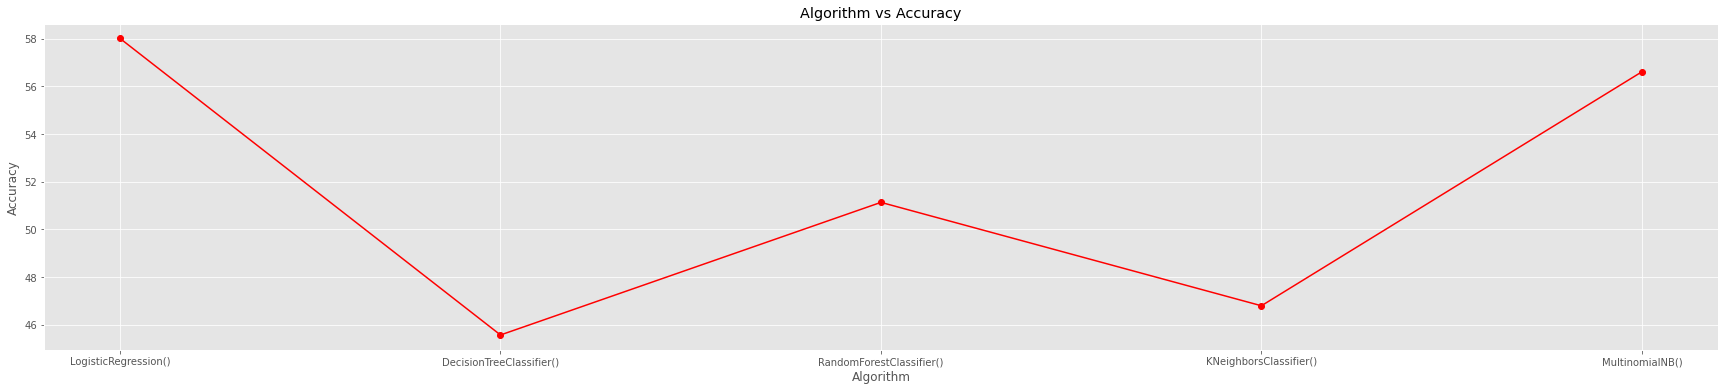

In [43]:
# make graph about Accuracy

plt.figure(figsize=(30, 6))
plt.title("Algorithm vs Accuracy")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(d.keys(),d.values(),marker='o',color='red')
plt.show()